In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Clone YOLOv5 repo and navigate to it
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install required dependencies
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.67 MiB | 18.20 MiB/s, done.
Resolving deltas: 100% (11704/11704), done.
/content/yolov5/yolov5


In [ ]:
!python train.py --img 640 --batch 16 --epochs 50 --data "/content/drive/MyDrive/Zebra Editable Label Generation Project/Data/ZPL Project/Data_subset_Final/data.yaml" --weights yolov5s.pt --project Colab_Pro_Project

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-08 02:33:22.710448: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-08 02:33:22.744635: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-08 02:33:22.754494: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visual

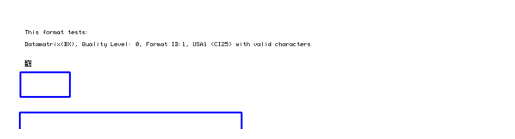

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to load ground truth bounding boxes from YOLO format file
def load_ground_truths(yolo_label_path, img_width, img_height):
    ground_truths = []
    with open(yolo_label_path, 'r', encoding='utf-8', errors='ignore') as file:
        for line in file:
            class_id, x_center, y_center, w, h = map(float, line.strip().split())
            # Convert YOLO format to (x_min, y_min, width, height) format
            x = int((x_center - w / 2) * img_width)
            y = int((y_center - h / 2) * img_height)
            w = int(w * img_width)
            h = int(h * img_height)
            ground_truths.append({'coordinates': (x, y, w, h)})
    return ground_truths

# Function to display image with bounding boxes
def display_image_with_boxes(image_path, ground_truths):
    # Attempt to load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}. Please check the file path.")
        return

    for box in ground_truths:
        # Draw ground truth bounding boxes in red
        x, y, w, h = box['coordinates']
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Red color for ground truth

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Usage example
image_path = '/content/drive/MyDrive/Zebra Editable Label Generation Project/Data/ZPL Project/Data_subset_Final/val/images/1240.bmp'  # Update to the correct image file
yolo_label_path = '/content/drive/MyDrive/Zebra Editable Label Generation Project/Data/ZPL Project/Data_subset_Final/val/labels/1240.txt'
img_width, img_height = 640, 640  # Replace with actual image dimensions if different

# Load ground truth boxes and display them on the image
ground_truths = load_ground_truths(yolo_label_path, img_width, img_height)
display_image_with_boxes(image_path, ground_truths)


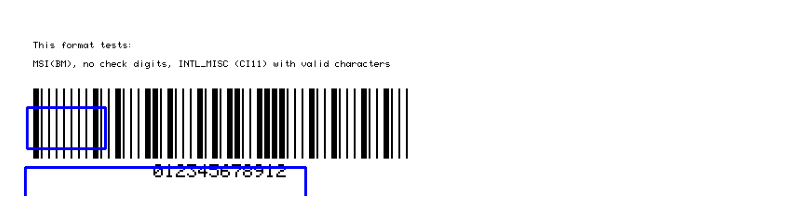

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to load ground truth bounding boxes from YOLO format file
def load_ground_truths(yolo_label_path, img_width, img_height):
    ground_truths = []
    with open(yolo_label_path, 'r', encoding='utf-8', errors='ignore') as file:
        for line in file:
            class_id, x_center, y_center, w, h = map(float, line.strip().split())
            # Convert YOLO format to (x_min, y_min, width, height) format
            x = int((x_center - w / 2) * img_width)
            y = int((y_center - h / 2) * img_height)
            w = int(w * img_width)
            h = int(h * img_height)
            ground_truths.append({'coordinates': (x, y, w, h)})
    return ground_truths

# Function to display image with bounding boxes
def display_image_with_boxes(image_path, ground_truths):
    # Attempt to load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}. Please check the file path.")
        return

    for box in ground_truths:
        # Draw ground truth bounding boxes in red
        x, y, w, h = box['coordinates']
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Red color for ground truth

    # Adjust the figure size for better visibility
    plt.figure(figsize=(10, 10))  # Adjust figure size as needed
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Usage example
image_path = '/content/drive/MyDrive/Zebra Editable Label Generation Project/Data/ZPL Project/Data_subset_Final/val/images/1025.bmp'  # Path to the image file
yolo_label_path = '/content/drive/MyDrive/Zebra Editable Label Generation Project/Data/ZPL Project/Data_subset_Final/val/labels/1025.txt'  # Path to the label file
img_width, img_height = 640, 640  # Replace with actual image dimensions if different

# Load ground truth boxes and display them on the image
ground_truths = load_ground_truths(yolo_label_path, img_width, img_height)
display_image_with_boxes(image_path, ground_truths)


In [9]:
!python train.py --img 640 --batch 16 --epochs 50 --data "/content/drive/MyDrive/Zebra Editable Label Generation Project/Data/ZPL Project/Data_subset_Final/data.yaml" --weights yolov5s.pt --project "/content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO" --name exp_custom


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-11 17:40:25.912012: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-11 17:40:25.931619: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-11 17:40:25.937672: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to regi

In [10]:
# Add these lines to your `hyp.scratch-low.yaml` or `hyp.scratch-high.yaml` file
fl_gamma: 2.0  # Focal loss gamma, adjusts the focus on hard examples


In [12]:
import torch.nn.functional as F

class ComputeLoss:
    def __init__(self, model, autobalance=False):
        # Existing code
        self.fl_gamma = getattr(model.hyp, 'fl_gamma', 0)  # Focal loss gamma

    def __call__(self, p, targets):  # predictions, targets, model
        # Existing code

        # Apply focal loss to classification and objectness losses
        if self.fl_gamma > 0:
            BCEcls = F.binary_cross_entropy_with_logits
            BCEobj = F.binary_cross_entropy_with_logits

            # Calculate Focal Loss for classification and objectness
            cls_loss = BCEcls(pi[:, :, 5:], to_onehot(targets[:, 1].long(), model.nc)) * alpha
            obj_loss = BCEobj(pi[:, :, 4], to_onehot(targets[:, 0].long(), 2)) * alpha

            cls_loss = cls_loss * (1 - cls_loss).pow(self.fl_gamma)  # apply focal loss
            obj_loss = obj_loss * (1 - obj_loss).pow(self.fl_gamma)  # apply focal loss



In [13]:
!python train.py --img 640 --batch 16 --epochs 50 --data "/content/drive/MyDrive/Zebra Editable Label Generation Project/Data/ZPL Project/Data_subset_Final/data.yaml" --weights yolov5s.pt --project "/content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO" --name exp_focal_loss --hyp data/hyps/hyp.scratch-low.yaml


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-11 18:16:50.686825: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-11 18:16:50.706410: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-11 18:16:50.712702: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visual

Fine-tuning model with hybrid loss

In [16]:
!python train.py --img 640 --batch 16 --epochs 50 --data "/content/drive/MyDrive/Zebra Editable Label Generation Project/Data/ZPL Project/Data_subset_Final/data.yaml" --weights yolov5s.pt --project "/content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO" --name exp_hybrid_loss


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-11 19:15:31.101297: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-11 19:15:31.121231: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-11 19:15:31.127955: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visual

## Running Interference and Extracting Outputs from Best Model

In [17]:
import torch
import json
from pathlib import Path
from PIL import Image
import torchvision.transforms as T

# Load your model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/weights/best.pt')
model.eval()  # Set to evaluation mode

# Directory of images for inference
image_dir = Path('/content/drive/MyDrive/Zebra Editable Label Generation Project/Data/ZPL Project/Data_subset_Final/test/Images')
output_dir = Path('/content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output')  # Directory where JSON outputs will be saved
output_dir.mkdir(parents=True, exist_ok=True)

# Run inference on each image and save outputs
for image_path in image_dir.glob('*.bmp'):
    # Run inference
    results = model(image_path)
    detections = results.pred[0]  # Get detections for the first image in the batch

    # Extract data and format it for JSON
    output_data = []
    for *box, conf, cls in detections:
        x_min, y_min, x_max, y_max = map(int, box)
        width = x_max - x_min
        height = y_max - y_min
        output_data.append({
            'class': model.names[int(cls)],  # Class label
            'confidence': float(conf),  # Confidence score
            'bbox': [x_min, y_min, width, height]  # Bounding box coordinates
        })

    # Save JSON file for each image
    output_file = output_dir / f'{image_path.stem}_detections.json'
    with open(output_file, 'w') as f:
        json.dump(output_data, f, indent=4)

    print(f'Saved output for {image_path.name} to {output_file}')


/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-11-11 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/

Saved output for 41.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/41_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 134.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/134_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1186.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1186_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1217.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1217_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 196.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/196_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 998.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/998_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1108.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1108_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 27.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/27_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 512.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/512_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 30.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/30_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 536.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/536_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 842.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/842_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 813.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/813_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1482.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1482_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 524.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/524_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1077.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1077_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1061.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1061_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 603.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/603_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1274.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1274_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 319.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/319_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1243.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1243_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1176.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1176_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1515.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1515_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 893.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/893_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 682.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/682_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 835.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/835_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1277.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1277_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 341.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/341_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 538.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/538_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1493.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1493_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 765.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/765_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 383.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/383_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 574.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/574_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 918.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/918_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 692.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/692_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 928.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/928_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 5.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/5_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1102.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1102_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 662.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/662_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 973.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/973_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1453.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1453_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 741.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/741_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1406.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1406_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1490.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1490_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 358.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/358_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 201.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/201_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 672.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/672_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 958.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/958_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 232.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/232_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 573.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/573_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1081.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1081_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 877.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/877_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 599.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/599_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1212.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1212_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 236.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/236_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 1384.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1384_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 561.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/561_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 121.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/121_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Saved output for 129.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/129_detections.json
Saved output for 1225.bmp to /content/drive/MyDrive/Zebra Editable Label Generation Project/YOLO/exp_hybrid_loss/output/1225_detections.json


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
